# 6.3 - Visualización en Python

En Python podemos realizar visualizaciones de todo tipo. En esta clase veremos algunas herramientas que nos permitirán crear gráficos. Algunos ejemplos:


![cuadrados](images/cuadrados.png)


![julia](images/julia.png)


![mandelbrot](images/mandelbrot.png)


En realidad, nuestros objetivos son dos, en primer lugar visualizar los datos para realizar un análisis exploratorio de los datos, EDA por las siglas en inglés. Necesitamos describir correctamente los datos y la visualización es una gran herramienta para ello. Nuestro segundo objetivo es representar los datos de tal manera que tengan narrativa, que podamos contar una historia a través de ellos. Es lo que se llama storytelling.

**¿Qué es storytelling?**

Es una técnica que utiliza datos para contar una historia. Es una forma útil de presentar información, lo que significa que se puede utilizar tanto con audiencias internas como externas. Si estás realizando la presentación de un informe, por ejemplo, puedes expresar mejor una idea o explicar mejor un punto si utilizas gráficos, tablas o infografías, ya que dichos contenidos retienen la atención de tu audiencia de una manera que un texto o incluso un video no lo pueden hacer. Estas herramientas facilitan el procesamiento de toda la información a la vez y la toma de decisiones.

El storytelling va más allá de representar datos de una manera más atractiva. Consiste en mostrar cómo o por qué los datos cambiaron durante un período, y para eso es necesario reunir:

+ una narrativa
+ un contexto
+ personajes

Estos son los factores clave para que tu audiencia se involucre realmente con el contenido.


Comenzaremos repasando algunos gráficos de la clase anterior, para EDA.

**Matplotlib/Pylab - Seaborn**

In [1]:
#import matplotlib.pyplot as plt
import pylab as plt

plt.rcParams['figure.figsize']=(15, 8)  # tamaño de los plots por defecto

import seaborn as sns

In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('../data/video_games_sales.csv')

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Comenzamos con la descripción estadística de los datos:

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 8.0 MB


In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


**Count plot**

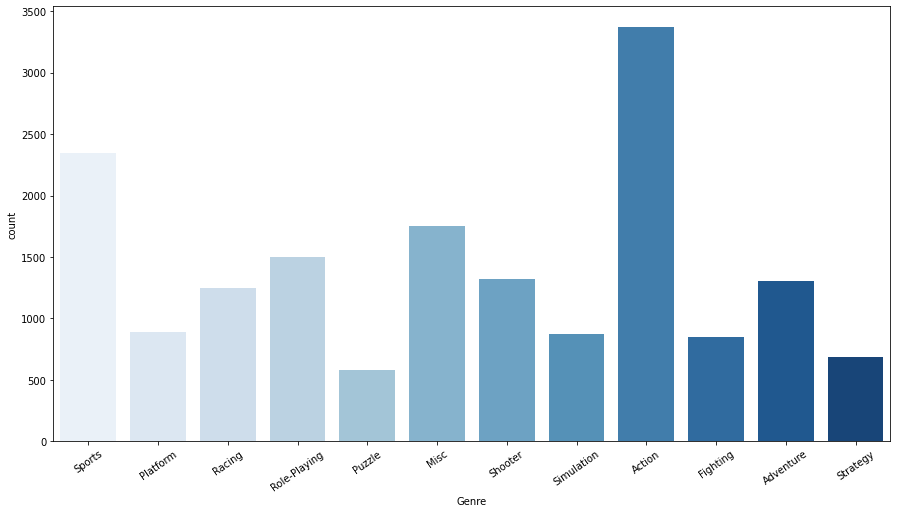

In [8]:
sns.countplot(x=df.Genre, palette='Blues')

plt.xticks(rotation=35);

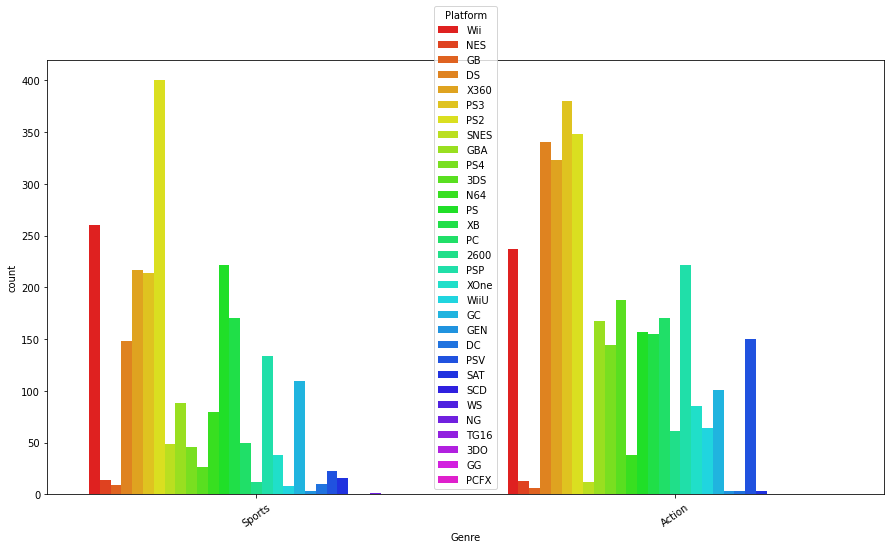

In [29]:
sns.countplot(x=df[(df.Genre=='Action')|(df.Genre=='Sports')].Genre,
             hue=df.Platform,
             palette='gist_rainbow')



plt.xticks(rotation=35);

**Histograma**

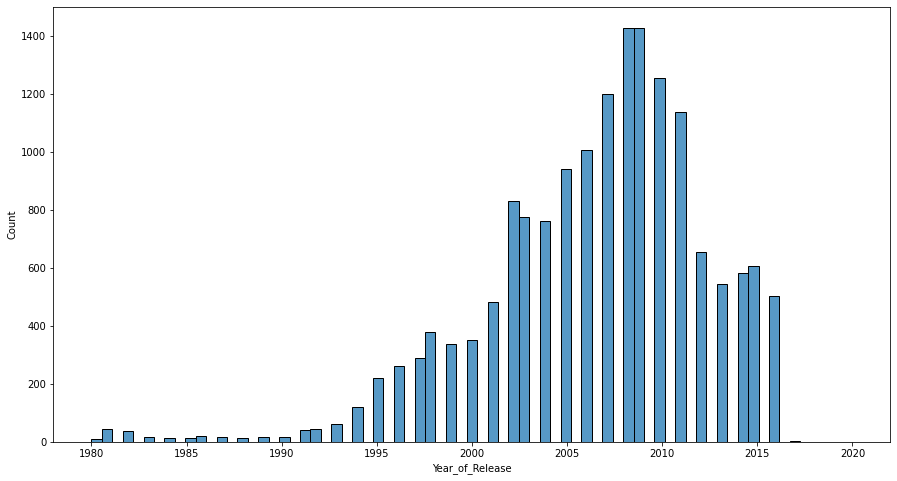

In [30]:
sns.histplot(x=df.Year_of_Release);

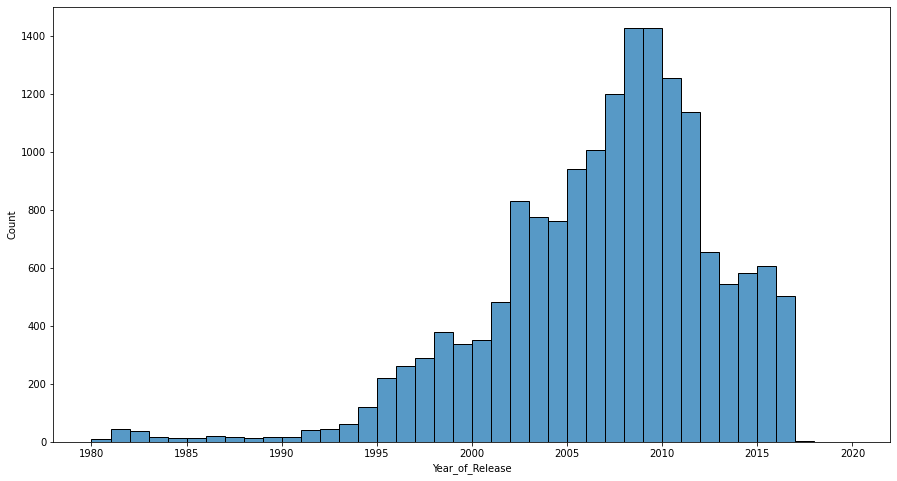

In [41]:
sns.histplot(x=df.Year_of_Release, bins=40);

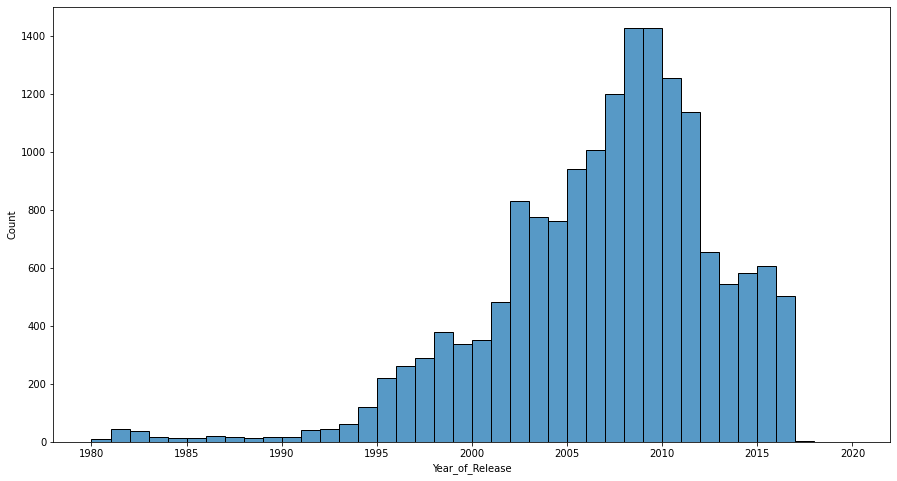

In [48]:
sns.histplot(x=df.Year_of_Release, binwidth=1);

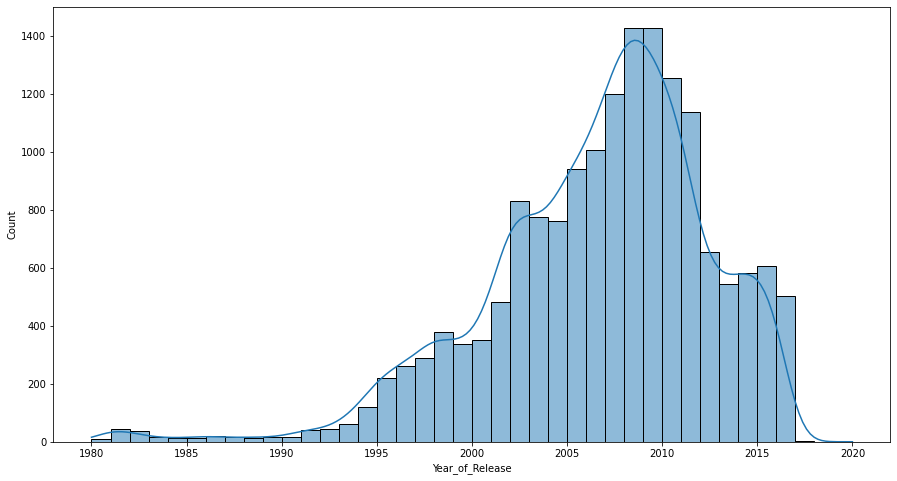

In [49]:
sns.histplot(x=df.Year_of_Release, bins=40, kde=True);  # kde=kernel density estimation

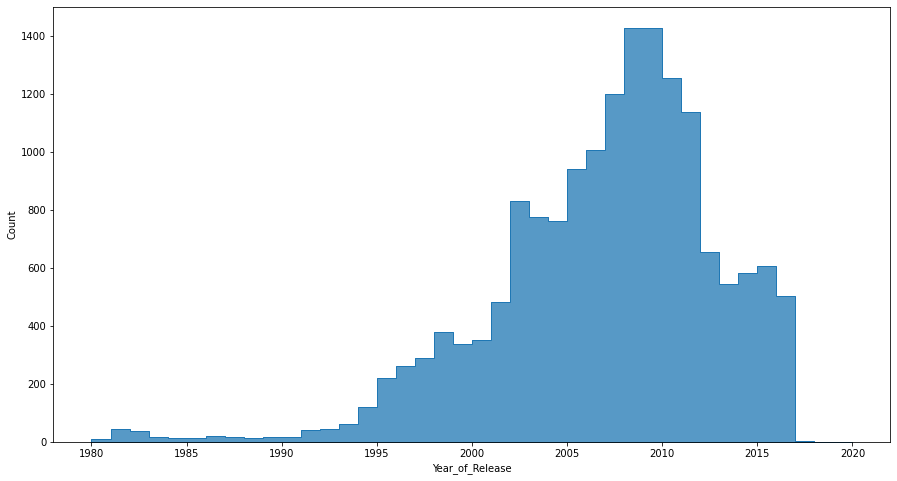

In [50]:
sns.histplot(x=df.Year_of_Release, bins=40, element='step');

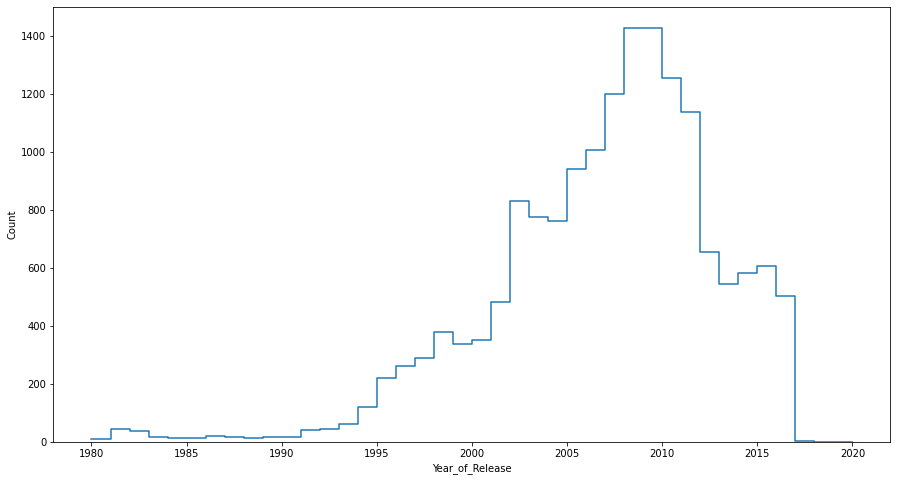

In [51]:
sns.histplot(x=df.Year_of_Release, bins=40, element='step', fill=False);

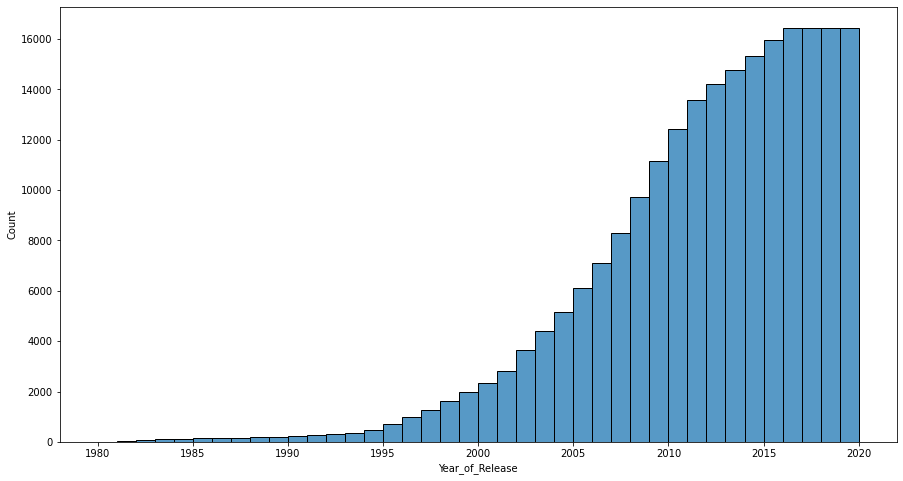

In [52]:
sns.histplot(x=df.Year_of_Release, bins=40, cumulative=True);

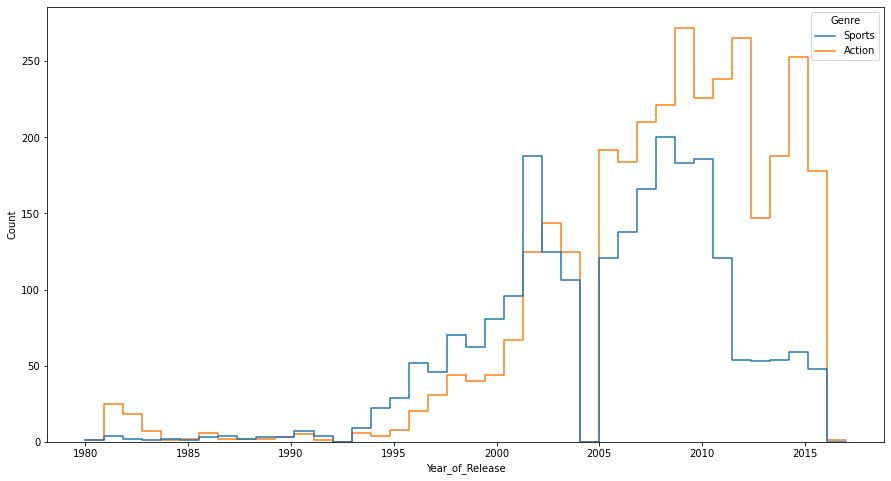

In [54]:
sns.histplot(x=df.Year_of_Release,
             hue=df[(df.Genre=='Action')|(df.Genre=='Sports')].Genre,
             bins=40,
             element='step',
             fill=False);

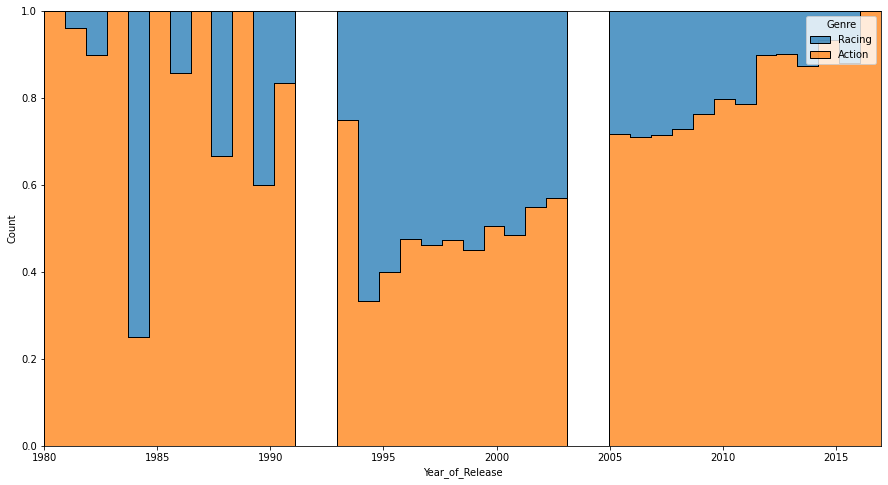

In [56]:
sns.histplot(x=df.Year_of_Release,
             hue=df[(df.Genre=='Action')|(df.Genre=='Racing')].Genre,
             bins=40,
             element='step',
             multiple='fill');

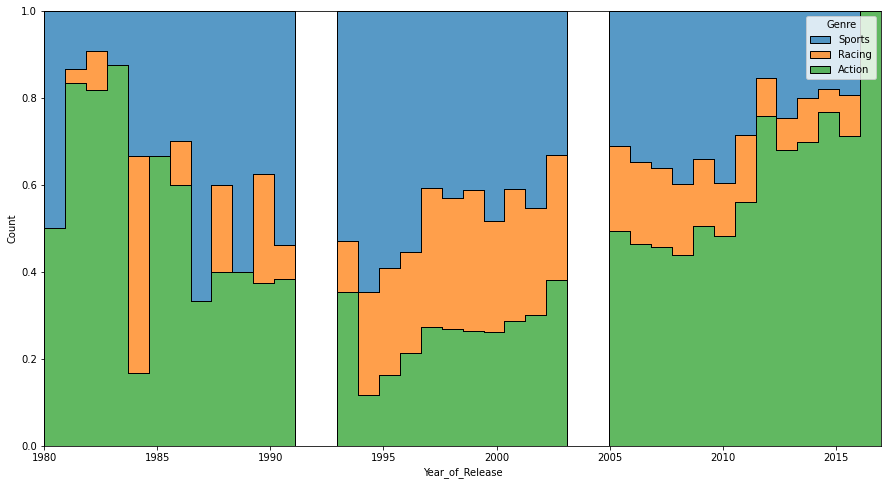

In [57]:
sns.histplot(x=df.Year_of_Release,
             hue=df[(df.Genre=='Action')|(df.Genre=='Racing')|(df.Genre=='Sports')].Genre,
             bins=40,
             element='step',
             multiple='fill');

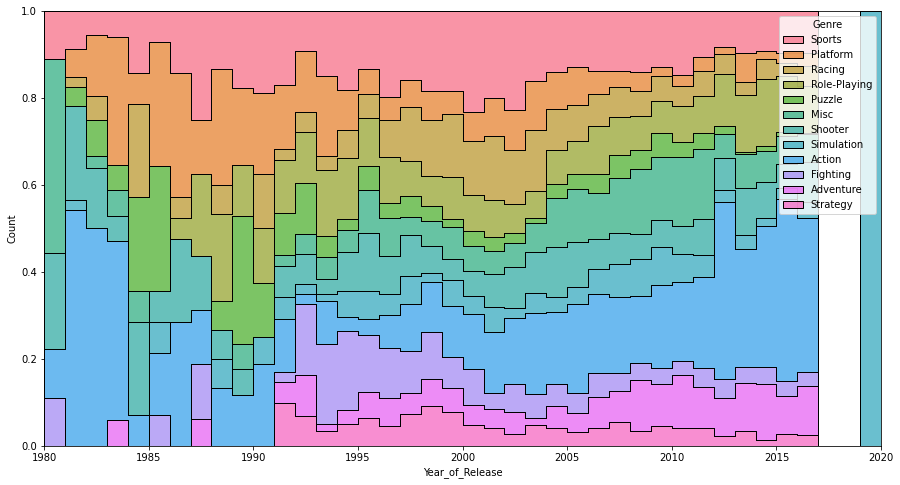

In [58]:
sns.histplot(x=df.Year_of_Release,
             hue=df.Genre,
             bins=40,
             element='step',
             multiple='fill');

**Scatter Plot**

**Pie Chart**

**Boxplot**

**Violin Plot**

**Correlacion**

**Radar chart**

**Gráficos en 3D**

**Line chart**

Normalmente para ver evolutivos.

**Bar chart race**

https://pypi.org/project/bar-chart-race/